<a href="https://colab.research.google.com/github/tanyasosa/SeriesDeTiempo_TSC_A01177961/blob/main/Inflaci%C3%B3n_TSC_A01177961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo, Grupo 102
## Tanya Sosa Cavazos A01177961
### Tecnologico de Monterrey
### Licenciado en administración financiera
### 4to semestre



**Introducción**

Una serie de tiempo es una secuencia ordenada de los valores en el tiempo de una variable. Es una secuencia periodica y ordenada. Y sirve para pronosticar el valor futuro de la variable. El enfoque utilizado en esta notebook es el enfoque estacionario. El enfoque estacionario normalmente se puede pronosticar ya que la variancia y media es constante a traves del tiempo. Para poder pronosticar debemos asegurarnos de que la serie de tiempos sea estacionario. En caso de no serlo, debemos hacer las series de tiempo diferencial para poder hacerlo estacionario. El mejor pronostico es el dato mas pequeño entre el BIC Y AIC. Al elegir el mejor criterio, se puede predecir los años o fechas deseadas. Diferenciar una serie nos ayudara a hacer los datos de la serie de tiempo estacionales para tener un pronostico mas exacto. Lo que diferencial hace, es eliminar la tendencia que mostraba la grafica, restando el valor actual con el valor anterior. A partir de ahi, se puede usar el modelo ARIMA para pronosticar a futuro los datos con mas exactitud. Uno de los principales problemas es que los resultados no siempre son los mas exactos ya que el programa suele proporcionar los primeros pronosticos correctos y despues los datos son constantes y no exactos. 

**Inflación**

La inflación existe cuando hay un aumento general en todos los precios. Esto significa que requerias menos producto o servicio por el mismo precio o incluso a un mayor precio. La inflacion reduce el valor de la moneda a lo largo del tiempo. Una de las principales causas por las que existe la inflacion, es por la gran cantidad de dinero en circulación. Si el pais no es capaz de cubrir productivamente la demanda, el precio sube al igual que la escasez, dando como resultado aumento de inflación. En México, la inflacion se mide con el indice nacional de precio a consumidor (INPC) . Este indice mide el porcentaje del incremento del precio de la canasta basica de una familia. El aumento de inflacion afecta financieramente a las empresas ya que, empresas que requieren compra de materia prima, tendran que pagar mas por la misma cantidad de producto requerido.


**Pronostico inflación**

Despues de graficar los datos y cambiar el modelo no estacionario a estacionario, elegi el criterio mas chico para poder obtener el pronostico mas exacto.

**A partir del 2023-04-01 obtuvimos el pronostico.**

2023-04-01    7.500028
2023-05-01    7.599708
2023-06-01    7.566370
2023-07-01    7.602558
2023-08-01    7.581728

Hoy en dia la inflación se encuentra en 7.6%, segun el pronostico a partir de Abril la inflación estara en una constante inestabilidad. En abril seguira disminuyendo 0.10%, el siguiente mes volvera a subir, y asi sucesivamente. 
La inflación volatil no es una buena noticia, ya que es muy dificil para las empresas tener una planeación a futuro de su estabilidad economica, sabiendo que la inflación estara aumentanto y disminuyendo constantemente. Aun asi, la inflación se encuentra en un porcentaje muy alto ya que segun los profesionales, una inflación sana para la economia es del 2%. 

In [1]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [4]:
procesos=pd.read_csv('/content/inflación_mex_61.csv')

In [5]:
procesos.head()

,fecha,inflación_12
0,2000/01,11.02
1,2000/02,10.52
2,2000/03,10.11
3,2000/04,9.73
4,2000/05,9.48


Graficamos el proceso de Tipo de cambio

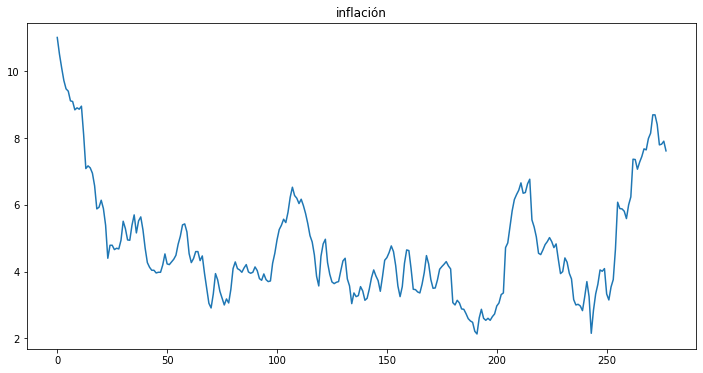

In [6]:
# figsize=( 12,6)
procesos['inflación_12'].plot()
plt.title('inflación')
plt.show()

**El tipo de cambio no es estacionario**
El tipo de cambio no es estacionario ya que la inflación, el crecimeinto economico, tasas de interes, etc, son factores que influyen ya sea en el aumento o disminuyo de valor de la moneda.
El tipo de cambio es considerado una caminata aleatoria ya que no se puede predecir.

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

## **Tipo de cambio**

In [7]:
# importamos la base de datos
inflación_12 = pd.read_csv('/content/inflación_mex_61.csv')

In [8]:
# vemos el dataframe
inflación_12.tail()

,fecha,inflación_12
273,2022/10,8.41
274,2022/11,7.80
275,2022/12,7.82
276,2023/01,7.91
277,2023/02,7.62


In [9]:
# importamos la base de datos
inflación_12 = pd.read_csv('/content/inflación_mex_61.csv')

In [10]:
inflación_12['fecha'] = pd.to_datetime(inflación_12['fecha'], format='%Y/%m')

In [11]:
inflación_12 = inflación_12.set_index('fecha')

In [12]:
inflación_12.index.freq =pd.infer_freq(inflación_12.index)

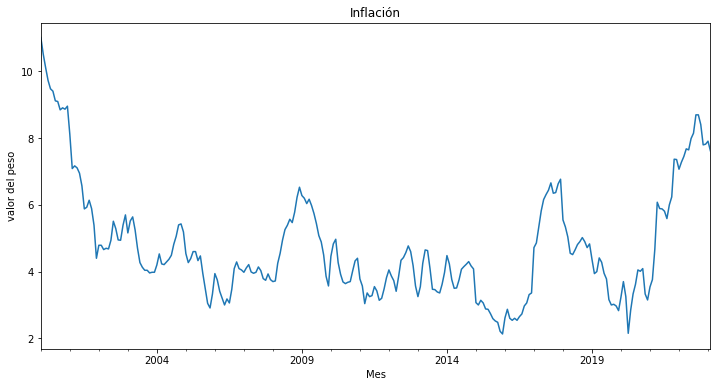

In [13]:
# comenzamos graficando la serie
# titulo y nombre a ejes
inflación_12['inflación_12'].plot();
plt.ylabel('valor del peso')
plt.xlabel('Mes')
plt.title('Inflación')
plt.show()

In [14]:
## vamos a verificar que la serie sea estacionaria
## Dickey Fuller Aumentada (Aumented Dickey fuller)
result_adf = adfuller(inflación_12['inflación_12'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.05


Recuerde que

 **$H_0:$ serie No estacionaria**

 **$H_a:$ serie estacionaria**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$

con un $\alpha=0.05$

conclusión: 0.05=0.05, Rechazamos H0, la inflación es una serie estacionaria





**¿Cómo diferenciar una serie?**

In [15]:
# diferenciar serie
inflación_12['inflación_diff'] = inflación_12['inflación_12'].diff()

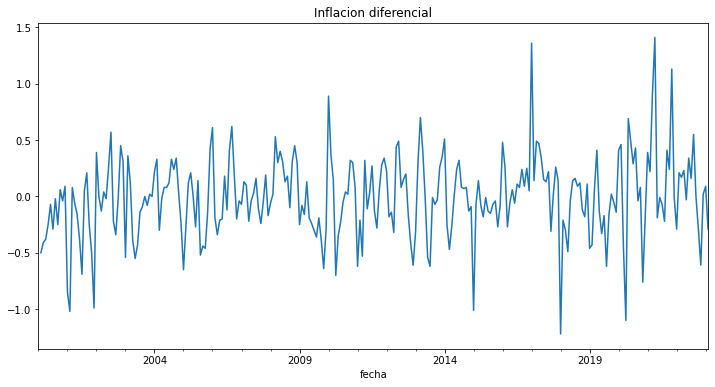

In [16]:
# graficamos esta nueva serie
inflación_12['inflación_diff'].plot()
plt.title('Inflacion diferencial')
plt.show()


Para determinar que tipo de proceso es recurriremos:

* Funcion de autocorrelación ACF
* Funcion de autocorrelación Parcial PACF

Realizamos la prueba de raices unitaria

In [17]:
result_adf = adfuller(inflación_12['inflación_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión
Pvalue=0.00<0.05, rechazamos H0, La serie diferenciada ahora es estacionaria

In [18]:
inflación_12

,inflación_12,inflación_diff
fecha,,
2000-01-01,11.02,NaN
2000-02-01,10.52,-0.50
2000-03-01,10.11,-0.41
2000-04-01,9.73,-0.38
2000-05-01,9.48,-0.25
...,...,...
2022-10-01,8.41,-0.29
2022-11-01,7.80,-0.61
2022-12-01,7.82,0.02


si la serie es estacionaria, tratamos de identificar que proceso es para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

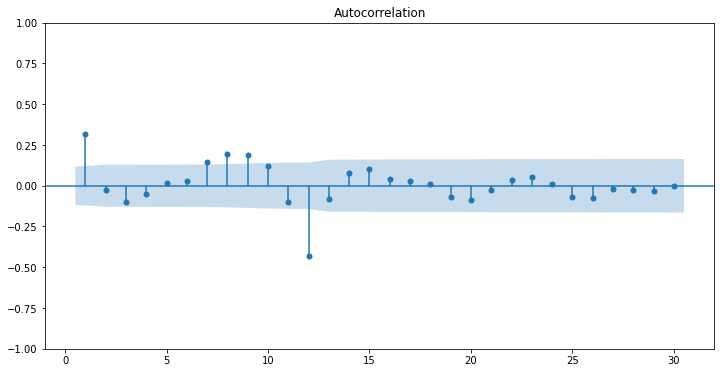

In [19]:
#plot_acf(serie, zero=False, lags=30);
plot_acf(inflación_12['inflación_diff'].dropna(),zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


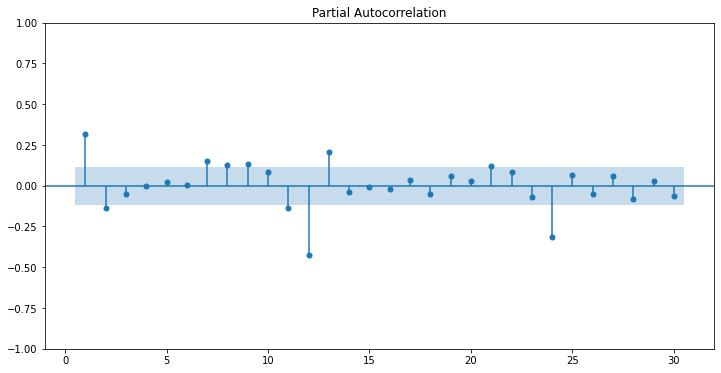

In [20]:
# autocorrelación parcial PACF
plot_pacf(inflación_12['inflación_diff'].dropna(), zero=False, lags=30);

Comentarios

In [21]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflación_12['inflación_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0   225.875902  233.123937
   1   195.301092  206.173144
   2   197.052927  211.548997
   3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
   1   197.136063  211.632133
   2   199.235174  217.355262
   3   199.371844  221.115949
   4   181.386305  206.754427
2  0   195.623104  210.119174
   1   197.035040  215.155128
   2   198.854833  220.598938
   3   183.895535  209.263658
   4   188.762659  217.754799
3  0   196.886055  215.006143
   1   198.885917  220.630022
   2   177.824847  203.192970
   3   178.359862  207.352002
   4   172.715337  205.331495
4  0   198.885786  220.629891
   1   182.928570  208.296693
   2   180.936431  209.928571
   3   181.214534  213.830692
   4   173.379139  209.619314

vamos a elegir el modelo que tiene "mejor" c riterio de Akaike (AIC). el valor más pequeño

In [22]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
3  4   172.715337  205.331495
4  4   173.379139  209.619314
3  2   177.824847  203.192970
   3   178.359862  207.352002
4  2   180.936431  209.928571
   3   181.214534  213.830692
1  4   181.386305  206.754427
4  1   182.928570  208.296693
2  3   183.895535  209.263658
   4   188.762659  217.754799
0  1   195.301092  206.173144
2  0   195.623104  210.119174
3  0   196.886055  215.006143
2  1   197.035040  215.155128
0  2   197.052927  211.548997
1  1   197.136063  211.632133
0  3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
2  2   198.854833  220.598938
4  0   198.885786  220.629891
3  1   198.885917  220.630022
1  2   199.235174  217.355262
   3   199.371844  221.115949
0  0   225.875902  233.123937

El criterio de Akaike (AIC) y el criterio bayesiano de información (BIC) nos sirve para elegir el modelo adecuado. 
Elegir solo uno, BIC o AIC.


Ente mas grande es el AIC/BIC es un peor modelo.

de acuerdo con el criterio 

el mejor modelo segun AIC es ARMA(3,4)

el modelo  estimar AR(3)

In [23]:
modelo1 = ARIMA(inflación_12['inflación_12'].dropna(), order=(3, 1, 4)) ##AR(3)
resultado1 = modelo1.fit() # calcula
print(resultado1.summary() )  #muestra

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           inflación_12   No. Observations:                  278
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 -84.422
Date:                Fri, 17 Mar 2023   AIC                            184.844
Time:                        04:06:06   BIC                            213.836
Sample:                    01-01-2000   HQIC                           196.477
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6070      0.518     -1.172      0.241      -1.623       0.408
ar.L2          0.2398      0.694      0.345      0.730      -1.121       1.601
ar.L3          0.0916      0.370      0.247      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
##realizamos pronóstico
inflación_12['inflación_pronosticada'] = resultado1.predict()


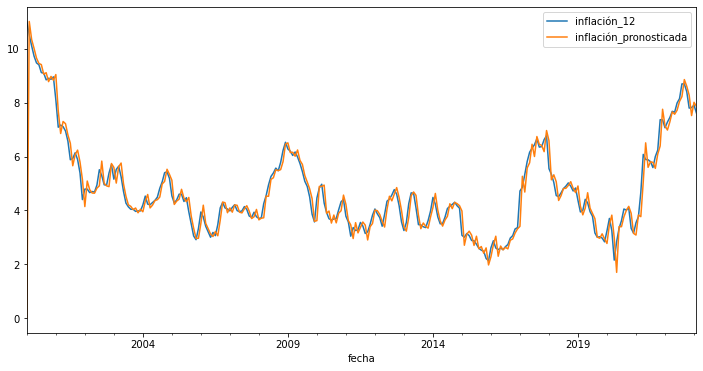

In [25]:
inflación_12[['inflación_12', 'inflación_pronosticada']].plot();

In [26]:
inflación_12.iloc[0]['inflación_pronosticada']=inflación_12.iloc[0]['inflación_12']

In [27]:
inflación_12.describe()

,inflación_12,inflación_diff,inflación_pronosticada
count,278.000000,277.000000,278.000000
mean,4.751511,-0.012274,4.761595
std,1.677582,0.361811,1.713998
min,2.130000,-1.220000,1.695116
25%,3.625000,-0.220000,3.617989
50%,4.290000,-0.010000,4.302072
75%,5.462500,0.210000,5.523507
max,11.020000,1.410000,11.020001


In [28]:
inflación_12.tail()

,inflación_12,inflación_diff,inflación_pronosticada
fecha,,,
2022-10-01,8.41,-0.29,8.611506
2022-11-01,7.80,-0.61,8.278932
2022-12-01,7.82,0.02,7.523067
2023-01-01,7.91,0.09,8.016285
2023-02-01,7.62,-0.29,7.861750


In [30]:
resultado1.predict(279,283)

2023-04-01    7.500028
2023-05-01    7.599708
2023-06-01    7.566370
2023-07-01    7.602558
2023-08-01    7.581728
Freq: MS, Name: predicted_mean, dtype: float64

El modelo pronostica que para Abril del 2023 la inflacion va a estar a 7.500028

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
